# Recognition of Actor using SVM

In [1]:
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray

In [6]:
allu=os.listdir("C:/Users/Nagendra Babu/Downloads/actors/allu")

In [7]:
ntr=os.listdir("C:/Users/Nagendra Babu/Downloads/actors/ntr")

In [8]:
ajith=os.listdir("C:/Users/Nagendra Babu/Downloads/actors/ajith")

In [9]:
limit=10
allu_images=[None]*limit
j=0
for i in allu:
    if(j<limit):
        allu_images[j]=imread("C:/Users/Nagendra Babu/Downloads/actors/allu/"+i)
        j+=1
    else:
        break

In [10]:
limit=10
ntr_images=[None]*limit
j=0
for i in ntr:
    if(j<limit):
        ntr_images[j]=imread("C:/Users/Nagendra Babu/Downloads/actors/ntr/"+i)
        j+=1
    else:
        break

In [11]:
limit=10
ajith_images=[None]*limit
j=0
for i in ajith:
    if(j<limit):
        ajith_images[j]=imread("C:/Users/Nagendra Babu/Downloads/actors/ajith/"+i)
        j+=1
    else:
        break

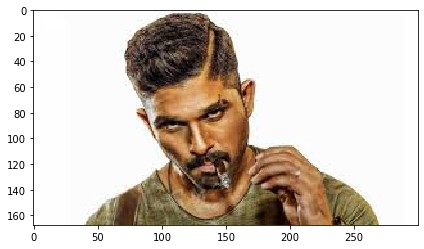

In [12]:
imshow(allu_images[1])

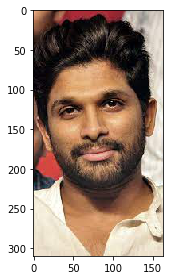

In [13]:
imshow(allu_images[2])

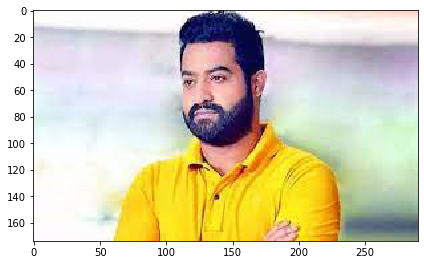

In [14]:
imshow(ntr_images[1])

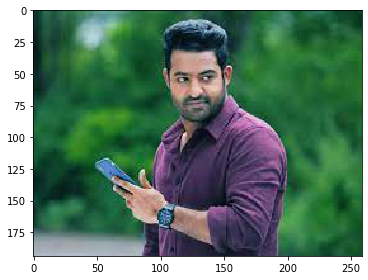

In [15]:
imshow(ntr_images[2])

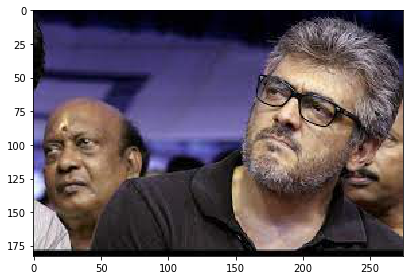

In [16]:
imshow(ajith_images[1])

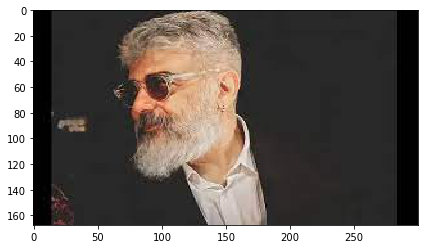

In [17]:
imshow(ajith_images[2])

In [18]:
allu_images[1].shape

(168, 300, 3)

# Convert color to gray

In [19]:
allu_gray=[None]*limit
j=0
for i in allu:
    if(j<limit):
        allu_gray[j]=rgb2gray(allu_images[j])
        j+=1
    else:
        break

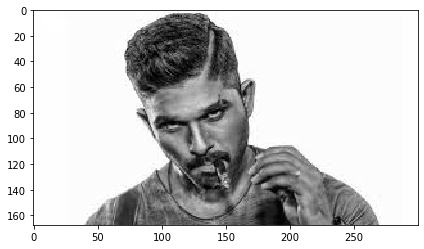

In [20]:
imshow(allu_gray[1])

In [21]:
ntr_gray=[None]*limit
j=0
for i in ntr:
    if(j<limit):
        ntr_gray[j]=rgb2gray(ntr_images[j])
        j+=1
    else:
        break

In [22]:
ajith_gray=[None]*limit
j=0
for i in ajith:
    if(j<limit):
        ajith_gray[j]=rgb2gray(ajith_images[j])
        j+=1
    else:
        break

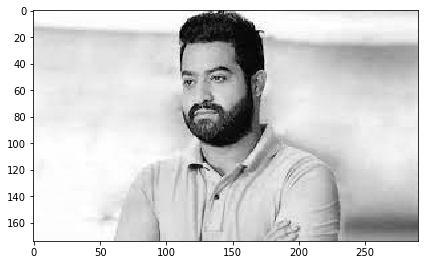

In [23]:
imshow(ntr_gray[1])

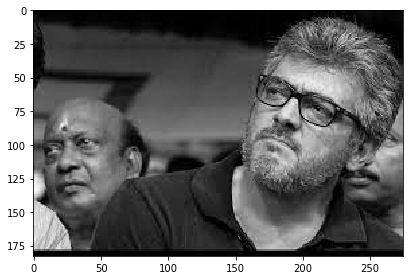

In [24]:
imshow(ajith_gray[1])

In [25]:
ntr_gray[1].shape

(174, 290)

In [26]:
ajith_gray[1].shape

(183, 275)

In [27]:
for j in range(10):
    c=allu_gray[j]
    allu_gray[j]=resize(c,(720,720))

In [28]:
for j in range(10):
    c=ntr_gray[j]
    ntr_gray[j]=resize(c,(720,720))

In [29]:
for j in range(10):
    c=ajith_gray[j]
    ajith_gray[j]=resize(c,(720,720))

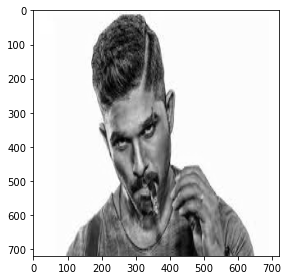

In [30]:
imshow(allu_gray[1])

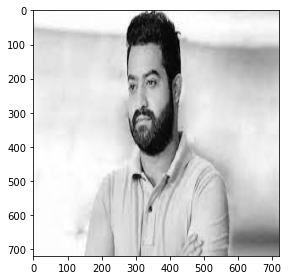

In [31]:
imshow(ntr_gray[1])

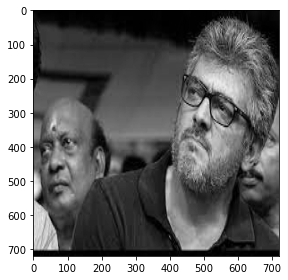

In [32]:
imshow(ajith_gray[1])

In [33]:
allu_gray[1].shape

(720, 720)

# Image Matrix to Vector Conversion

In [34]:
len_of_images_allu=len(allu_gray)
len_of_images_ntr=len(ntr_gray)
len_of_images_ajith=len(ajith_gray)

In [35]:
images_size_allu=allu_gray[1].shape

In [36]:
images_size_allu

(720, 720)

In [37]:
images_size_ntr=ntr_gray[1].shape
images_size_ajith=ajith_gray[1].shape

# Create a Variable flatten size which contains product of (512,512)

In [38]:
flatten_size_ntr=images_size_ntr[0]*images_size_ntr[1]
flatten_size_ajith=images_size_ajith[0]*images_size_ajith[1]
flatten_size_allu=images_size_allu[0]*images_size_allu[1]

In [39]:
flatten_size_allu

518400

In [40]:
for i in range(len_of_images_allu):
    allu_gray[i]=np.ndarray.flatten(allu_gray[i]).reshape(flatten_size_allu,1)

In [41]:
allu_gray=np.dstack(allu_gray)

In [42]:
allu_gray[0].shape

(1, 10)

In [94]:
allu_gray=np.rollaxis(allu_gray,axis=1,start=0)

In [95]:
allu_gray.shape

(10, 518400)

In [45]:
allu_gray=allu_gray.reshape(len_of_images_allu,flatten_size_allu)

In [46]:
allu_data=pd.DataFrame(allu_gray)

In [47]:
allu_gray

array([[0.98597255, 0.98597255, 0.98597255, ..., 1.        , 1.        ,
        1.        ],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.71382325, 0.71509185, 0.71562108, ..., 0.88781412, 0.88781412,
        0.88781412],
       ...,
       [0.1561063 , 0.15940695, 0.15517492, ..., 0.7146149 , 0.7146149 ,
        0.7146149 ],
       [0.27445138, 0.27516435, 0.27482883, ..., 0.02629201, 0.02760072,
        0.02481972],
       [0.33174549, 0.33174549, 0.33174549, ..., 0.14959843, 0.14959843,
        0.14959843]])

In [48]:
allu_data

,0,1,2,3,4,5,6,7,8,9,...,518390,518391,518392,518393,518394,518395,518396,518397,518398,518399
0,0.985973,0.985973,0.985973,0.985973,0.986306,0.987315,0.988324,0.988778,0.988778,0.988778,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078
2,0.713823,0.715092,0.715621,0.714352,0.713084,0.711815,0.710547,0.709889,0.709320,0.708750,...,0.887814,0.887814,0.887814,0.887814,0.887814,0.887814,0.887814,0.887814,0.887814,0.887814
3,0.108367,0.108367,0.108367,0.108367,0.106897,0.105263,0.104446,0.104446,0.104446,0.104446,...,0.046063,0.044449,0.036162,0.027134,0.025697,0.031852,0.039535,0.060966,0.082396,0.073824
4,0.960089,0.963775,0.962169,0.958484,0.954798,0.947931,0.923518,0.899104,0.874691,0.834310,...,0.278688,0.228919,0.276303,0.323687,0.371070,0.441757,0.516668,0.591579,0.624214,0.549303
5,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,...,0.956863,0.955869,0.954371,0.952941,0.952941,0.952941,0.952941,0.952941,0.952941,0.952941
6,0.086736,0.086736,0.086736,0.086736,0.087467,0.089684,0.091900,0.093673,0.095084,0.096495,...,0.309056,0.300099,0.291143,0.286215,0.286215,0.286215,0.286215,0.286215,0.286215,0.286215
7,0.156106,0.159407,0.155175,0.150943,0.146245,0.140602,0.134960,0.130146,0.126011,0.121875,...,0.711025,0.712432,0.713840,0.714615,0.714615,0.714615,0.714615,0.714615,0.714615,0.714615
8,0.274451,0.275164,0.274829,0.274116,0.273403,0.272837,0.272837,0.272837,0.272837,0.272567,...,0.044894,0.036332,0.030776,0.025221,0.019665,0.020730,0.023511,0.026292,0.027601,0.024820
9,0.331745,0.331745,0.331745,0.331745,0.331745,0.331745,0.331745,0.331745,0.331745,0.331745,...,0.146788,0.147703,0.148618,0.149533,0.149598,0.149598,0.149598,0.149598,0.149598,0.149598


In [49]:
allu_data["label"]="allu"

In [50]:
allu_data

,0,1,2,3,4,5,6,7,8,9,...,518391,518392,518393,518394,518395,518396,518397,518398,518399,label
0,0.985973,0.985973,0.985973,0.985973,0.986306,0.987315,0.988324,0.988778,0.988778,0.988778,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,allu
1,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,allu
2,0.713823,0.715092,0.715621,0.714352,0.713084,0.711815,0.710547,0.709889,0.709320,0.708750,...,0.887814,0.887814,0.887814,0.887814,0.887814,0.887814,0.887814,0.887814,0.887814,allu
3,0.108367,0.108367,0.108367,0.108367,0.106897,0.105263,0.104446,0.104446,0.104446,0.104446,...,0.044449,0.036162,0.027134,0.025697,0.031852,0.039535,0.060966,0.082396,0.073824,allu
4,0.960089,0.963775,0.962169,0.958484,0.954798,0.947931,0.923518,0.899104,0.874691,0.834310,...,0.228919,0.276303,0.323687,0.371070,0.441757,0.516668,0.591579,0.624214,0.549303,allu
5,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,...,0.955869,0.954371,0.952941,0.952941,0.952941,0.952941,0.952941,0.952941,0.952941,allu
6,0.086736,0.086736,0.086736,0.086736,0.087467,0.089684,0.091900,0.093673,0.095084,0.096495,...,0.300099,0.291143,0.286215,0.286215,0.286215,0.286215,0.286215,0.286215,0.286215,allu
7,0.156106,0.159407,0.155175,0.150943,0.146245,0.140602,0.134960,0.130146,0.126011,0.121875,...,0.712432,0.713840,0.714615,0.714615,0.714615,0.714615,0.714615,0.714615,0.714615,allu
8,0.274451,0.275164,0.274829,0.274116,0.273403,0.272837,0.272837,0.272837,0.272837,0.272567,...,0.036332,0.030776,0.025221,0.019665,0.020730,0.023511,0.026292,0.027601,0.024820,allu
9,0.331745,0.331745,0.331745,0.331745,0.331745,0.331745,0.331745,0.331745,0.331745,0.331745,...,0.147703,0.148618,0.149533,0.149598,0.149598,0.149598,0.149598,0.149598,0.149598,allu


In [51]:
for i in range(len_of_images_ntr):
    ntr_gray[i]=np.ndarray.flatten(ntr_gray[i].reshape(flatten_size_ntr,1))

In [52]:
for i in range(len_of_images_ajith):
    ajith_gray[i]=np.ndarray.flatten(ajith_gray[i].reshape(flatten_size_ajith,1))

In [53]:
ntr_gray=np.dstack(ntr_gray)

In [54]:
ajith_gray=np.dstack(ajith_gray)

In [55]:
ntr_gray=np.rollaxis(ntr_gray,axis=2,start=0)

In [56]:
ajith_gray=np.rollaxis(ajith_gray,axis=2,start=0)

In [57]:
ntr_gray=ntr_gray.reshape(len_of_images_ntr,flatten_size_ntr)

In [58]:
ajith_gray=ajith_gray.reshape(len_of_images_ajith,flatten_size_ajith)

In [59]:
ntr_data=pd.DataFrame(ntr_gray)

In [60]:
ajith_data=pd.DataFrame(ajith_gray)

In [61]:
ntr_data

,0,1,2,3,4,5,6,7,8,9,...,518390,518391,518392,518393,518394,518395,518396,518397,518398,518399
0,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.190244,0.169068,0.147622,0.126176,0.105743,0.089792,0.073841,0.057891,0.054533,0.070483
1,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.575416,0.574507,0.573909,0.573310,0.572093,0.570620,0.569477,0.569477,0.569477,0.569477
2,0.183815,0.185462,0.183350,0.181238,0.179126,0.177014,0.174902,0.174066,0.174272,0.174478,...,0.239164,0.242379,0.245594,0.247362,0.247362,0.247362,0.247362,0.247362,0.247362,0.247362
3,0.211084,0.211925,0.211870,0.211028,0.210187,0.209345,0.207217,0.204227,0.201237,0.198247,...,0.102348,0.103345,0.104342,0.105339,0.106736,0.108729,0.110723,0.112716,0.112847,0.110853
4,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,...,0.285396,0.297390,0.349939,0.402488,0.455037,0.484645,0.510919,0.537194,0.548174,0.521900
5,0.170754,0.167448,0.170045,0.173351,0.176657,0.179375,0.181815,0.184256,0.184145,0.181091,...,0.099170,0.097150,0.095559,0.094339,0.093119,0.092156,0.091735,0.091315,0.090985,0.091405
6,0.664094,0.664094,0.664094,0.664094,0.664008,0.656279,0.656251,0.656251,0.656251,0.657092,...,0.354750,0.386792,0.434695,0.464828,0.485585,0.515446,0.545497,0.567219,0.603607,0.610313
7,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,...,0.632397,0.632287,0.632177,0.632116,0.632116,0.632116,0.632116,0.632116,0.632116,0.632116
8,0.146534,0.146534,0.146534,0.146517,0.145482,0.144446,0.143676,0.143023,0.142228,0.141193,...,0.191900,0.191900,0.191900,0.191900,0.191900,0.191900,0.191900,0.191900,0.191900,0.191900
9,0.249690,0.246268,0.245291,0.248712,0.252134,0.255555,0.259086,0.264043,0.269000,0.273957,...,0.915891,0.914976,0.914061,0.913146,0.913080,0.913080,0.913080,0.913080,0.913080,0.913080


In [62]:
ajith_gray

array([[0.50459294, 0.50328575, 0.50655373, ..., 0.92997998, 0.91753444,
        0.92251266],
       [0.01617128, 0.01597405, 0.0162931 , ..., 0.00292484, 0.00292484,
        0.00292484],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       ...,
       [0.03921569, 0.03921569, 0.03921569, ..., 0.02196719, 0.02196719,
        0.02196719],
       [0.59082508, 0.59280487, 0.58785539, ..., 0.53372328, 0.56074636,
        0.54993713],
       [0.57562187, 0.57616654, 0.57447808, ..., 0.06805603, 0.06636758,
        0.06691224]])

In [63]:
ntr_data

,0,1,2,3,4,5,6,7,8,9,...,518390,518391,518392,518393,518394,518395,518396,518397,518398,518399
0,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.190244,0.169068,0.147622,0.126176,0.105743,0.089792,0.073841,0.057891,0.054533,0.070483
1,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.575416,0.574507,0.573909,0.573310,0.572093,0.570620,0.569477,0.569477,0.569477,0.569477
2,0.183815,0.185462,0.183350,0.181238,0.179126,0.177014,0.174902,0.174066,0.174272,0.174478,...,0.239164,0.242379,0.245594,0.247362,0.247362,0.247362,0.247362,0.247362,0.247362,0.247362
3,0.211084,0.211925,0.211870,0.211028,0.210187,0.209345,0.207217,0.204227,0.201237,0.198247,...,0.102348,0.103345,0.104342,0.105339,0.106736,0.108729,0.110723,0.112716,0.112847,0.110853
4,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,...,0.285396,0.297390,0.349939,0.402488,0.455037,0.484645,0.510919,0.537194,0.548174,0.521900
5,0.170754,0.167448,0.170045,0.173351,0.176657,0.179375,0.181815,0.184256,0.184145,0.181091,...,0.099170,0.097150,0.095559,0.094339,0.093119,0.092156,0.091735,0.091315,0.090985,0.091405
6,0.664094,0.664094,0.664094,0.664094,0.664008,0.656279,0.656251,0.656251,0.656251,0.657092,...,0.354750,0.386792,0.434695,0.464828,0.485585,0.515446,0.545497,0.567219,0.603607,0.610313
7,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,...,0.632397,0.632287,0.632177,0.632116,0.632116,0.632116,0.632116,0.632116,0.632116,0.632116
8,0.146534,0.146534,0.146534,0.146517,0.145482,0.144446,0.143676,0.143023,0.142228,0.141193,...,0.191900,0.191900,0.191900,0.191900,0.191900,0.191900,0.191900,0.191900,0.191900,0.191900
9,0.249690,0.246268,0.245291,0.248712,0.252134,0.255555,0.259086,0.264043,0.269000,0.273957,...,0.915891,0.914976,0.914061,0.913146,0.913080,0.913080,0.913080,0.913080,0.913080,0.913080


In [64]:
ntr_data["label"]="ntr"

In [65]:
ajith_data["label"]="ajith"

In [66]:
actor=pd.concat([allu_data,ntr_data,ajith_data])

In [67]:
actor

,0,1,2,3,4,5,6,7,8,9,...,518391,518392,518393,518394,518395,518396,518397,518398,518399,label
0,0.985973,0.985973,0.985973,0.985973,0.986306,0.987315,0.988324,0.988778,0.988778,0.988778,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,allu
1,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,allu
2,0.713823,0.715092,0.715621,0.714352,0.713084,0.711815,0.710547,0.709889,0.709320,0.708750,...,0.887814,0.887814,0.887814,0.887814,0.887814,0.887814,0.887814,0.887814,0.887814,allu
3,0.108367,0.108367,0.108367,0.108367,0.106897,0.105263,0.104446,0.104446,0.104446,0.104446,...,0.044449,0.036162,0.027134,0.025697,0.031852,0.039535,0.060966,0.082396,0.073824,allu
4,0.960089,0.963775,0.962169,0.958484,0.954798,0.947931,0.923518,0.899104,0.874691,0.834310,...,0.228919,0.276303,0.323687,0.371070,0.441757,0.516668,0.591579,0.624214,0.549303,allu
5,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,...,0.955869,0.954371,0.952941,0.952941,0.952941,0.952941,0.952941,0.952941,0.952941,allu
6,0.086736,0.086736,0.086736,0.086736,0.087467,0.089684,0.091900,0.093673,0.095084,0.096495,...,0.300099,0.291143,0.286215,0.286215,0.286215,0.286215,0.286215,0.286215,0.286215,allu
7,0.156106,0.159407,0.155175,0.150943,0.146245,0.140602,0.134960,0.130146,0.126011,0.121875,...,0.712432,0.713840,0.714615,0.714615,0.714615,0.714615,0.714615,0.714615,0.714615,allu
8,0.274451,0.275164,0.274829,0.274116,0.273403,0.272837,0.272837,0.272837,0.272837,0.272567,...,0.036332,0.030776,0.025221,0.019665,0.020730,0.023511,0.026292,0.027601,0.024820,allu
9,0.331745,0.331745,0.331745,0.331745,0.331745,0.331745,0.331745,0.331745,0.331745,0.331745,...,0.147703,0.148618,0.149533,0.149598,0.149598,0.149598,0.149598,0.149598,0.149598,allu


# Shuffing with in DataFrame

In [68]:
from sklearn.utils import shuffle

In [69]:
actors_indexed=shuffle(actor).reset_index()

In [70]:
actors_indexed

,index,0,1,2,3,4,5,6,7,8,...,518391,518392,518393,518394,518395,518396,518397,518398,518399,label
0,3,0.211084,0.211925,0.211870,0.211028,0.210187,0.209345,0.207217,0.204227,0.201237,...,0.103345,0.104342,0.105339,0.106736,0.108729,0.110723,0.112716,0.112847,0.110853,ntr
1,7,0.039216,0.039216,0.039216,0.039216,0.039536,0.040094,0.040653,0.041575,0.042514,...,0.098706,0.059444,0.021967,0.021967,0.021967,0.021967,0.021967,0.021967,0.021967,ajith
2,7,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,...,0.632287,0.632177,0.632116,0.632116,0.632116,0.632116,0.632116,0.632116,0.632116,ntr
3,3,0.108367,0.108367,0.108367,0.108367,0.106897,0.105263,0.104446,0.104446,0.104446,...,0.044449,0.036162,0.027134,0.025697,0.031852,0.039535,0.060966,0.082396,0.073824,allu
4,2,0.183815,0.185462,0.183350,0.181238,0.179126,0.177014,0.174902,0.174066,0.174272,...,0.242379,0.245594,0.247362,0.247362,0.247362,0.247362,0.247362,0.247362,0.247362,ntr
5,1,0.016171,0.015974,0.016293,0.016612,0.017056,0.017592,0.018129,0.018310,0.018475,...,0.001833,0.002392,0.002925,0.002925,0.002925,0.002925,0.002925,0.002925,0.002925,ajith
6,0,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.169068,0.147622,0.126176,0.105743,0.089792,0.073841,0.057891,0.054533,0.070483,ntr
7,3,0.199091,0.198849,0.199454,0.200059,0.199536,0.198888,0.198995,0.199857,0.200757,...,0.206586,0.206749,0.206749,0.206749,0.206749,0.206749,0.206749,0.206749,0.206749,ajith
8,2,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,ajith
9,5,0.170754,0.167448,0.170045,0.173351,0.176657,0.179375,0.181815,0.184256,0.184145,...,0.097150,0.095559,0.094339,0.093119,0.092156,0.091735,0.091315,0.090985,0.091405,ntr


In [71]:
actors=actors_indexed

In [72]:
actors

,index,0,1,2,3,4,5,6,7,8,...,518391,518392,518393,518394,518395,518396,518397,518398,518399,label
0,3,0.211084,0.211925,0.211870,0.211028,0.210187,0.209345,0.207217,0.204227,0.201237,...,0.103345,0.104342,0.105339,0.106736,0.108729,0.110723,0.112716,0.112847,0.110853,ntr
1,7,0.039216,0.039216,0.039216,0.039216,0.039536,0.040094,0.040653,0.041575,0.042514,...,0.098706,0.059444,0.021967,0.021967,0.021967,0.021967,0.021967,0.021967,0.021967,ajith
2,7,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,...,0.632287,0.632177,0.632116,0.632116,0.632116,0.632116,0.632116,0.632116,0.632116,ntr
3,3,0.108367,0.108367,0.108367,0.108367,0.106897,0.105263,0.104446,0.104446,0.104446,...,0.044449,0.036162,0.027134,0.025697,0.031852,0.039535,0.060966,0.082396,0.073824,allu
4,2,0.183815,0.185462,0.183350,0.181238,0.179126,0.177014,0.174902,0.174066,0.174272,...,0.242379,0.245594,0.247362,0.247362,0.247362,0.247362,0.247362,0.247362,0.247362,ntr
5,1,0.016171,0.015974,0.016293,0.016612,0.017056,0.017592,0.018129,0.018310,0.018475,...,0.001833,0.002392,0.002925,0.002925,0.002925,0.002925,0.002925,0.002925,0.002925,ajith
6,0,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.169068,0.147622,0.126176,0.105743,0.089792,0.073841,0.057891,0.054533,0.070483,ntr
7,3,0.199091,0.198849,0.199454,0.200059,0.199536,0.198888,0.198995,0.199857,0.200757,...,0.206586,0.206749,0.206749,0.206749,0.206749,0.206749,0.206749,0.206749,0.206749,ajith
8,2,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,ajith
9,5,0.170754,0.167448,0.170045,0.173351,0.176657,0.179375,0.181815,0.184256,0.184145,...,0.097150,0.095559,0.094339,0.093119,0.092156,0.091735,0.091315,0.090985,0.091405,ntr


In [98]:
actors.to_csv("C:/Users/Nagendra Babu/Downloads/actors.csv")

In [99]:
x=actors.values[:,:-1]

In [100]:
x

array([[3, 0.21108364027040216, 0.2119254701031454, ...,
        0.11271596949891069, 0.1128466884531594, 0.11085322440087161],
       [7, 0.0392156862745098, 0.0392156862745098, ...,
        0.021967189542483674, 0.021967189542483674, 0.021967189542483674],
       [7, 0.9882352941176471, 0.9882352941176471, ...,
        0.6321164705882353, 0.6321164705882353, 0.6321164705882354],
       ...,
       [9, 0.24968972848583884, 0.24626841748366013, ...,
        0.913080343137255, 0.913080343137255, 0.913080343137255],
       [1, 0.996078431372549, 0.996078431372549, ..., 0.9960784313725489,
        0.996078431372549, 0.9960784313725489],
       [5, 0.0392156862745098, 0.0392156862745098, ...,
        0.9529411764705883, 0.9529411764705882, 0.9529411764705882]],
      dtype=object)

In [101]:
y=actors.values[:,-1]

In [102]:
y

array(['ntr', 'ajith', 'ntr', 'allu', 'ntr', 'ajith', 'ntr', 'ajith',
       'ajith', 'ntr', 'ntr', 'ajith', 'allu', 'ntr', 'ajith', 'allu',
       'ajith', 'ntr', 'allu', 'allu', 'ntr', 'ajith', 'allu', 'allu',
       'allu', 'ajith', 'ajith', 'ntr', 'allu', 'allu'], dtype=object)

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [104]:
from sklearn import svm

In [105]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [108]:
y_pred=clf.predict(x_test)
y_pred

array(['ajith', 'allu', 'ajith', 'ajith', 'ajith', 'ajith'], dtype=object)

In [109]:
for i in range(6):
    predictd_images=(np.reshape(x_test[i],(720,720)).astype(np.float64))
    plt.title('predicted label1: {0}'.format(y_pred[i]))
    plt.imshow(predicted_images,interpolation='nearest',cmap='gray')
    plt.show()

ValueError: cannot reshape array of size 518401 into shape (720,720)

In [110]:
from sklearn import metrics

In [112]:
accuracy=metrics.accuracy_score(y_test,y_pred)

In [113]:
accuracy

0.3333333333333333

In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
confusion_matrix(y_test,y_pred)

array([[1, 0, 0],
       [1, 1, 0],
       [3, 0, 0]], dtype=int64)